In [1]:
import torch
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets
import torch.optim as optim
from torchvision.transforms import transforms
from torchvision.utils import save_image

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from DataSet import WaterTemperatureDataSet, visualize_tensor, visualize_target

import pandas as pd
import datetime

from Loss.dilate import dilate_loss 
from Trainer import trainLSTM, plot_prediction
from torch.autograd import Variable

from LSTMs import Simple, WaterLSTM


In [2]:
folder = "DataSets" 
WTA1_Dataset = pd.read_csv(folder + "\WTA1_DataSet.csv")

WTA1_Dataset.drop(["location"], axis=1, inplace=True)

Data = WaterTemperatureDataSet(WTA1_Dataset, target_cols=["Water_Avg"], numerical_cols=['Air_Min', 'Air_Max', "Air_Avg", 'season'], 
                                categorical_cols=[""], discriminator_col="TimeSeries")

train_iter, test_iter = Data.get_loaders()


input_size = 4
hidden_size = 2
seq_length = 365
num_classes = 1
num_layers = 365
filepath="Parameters/model1_parameters.pt"

model = WaterLSTM(input_size, hidden_size, seq_length, num_classes, num_layers)
simple = Simple()

loss_function = nn.MSELoss()

In [3]:
epochs, total_loss, test_loss = trainLSTM(simple, train_iter, test_iter, filepath=filepath, learning_rate=0.01, epochs=100, print_every=10, )

epoch  0  loss  9680.4580078125
epoch  10  loss  49.176395416259766
epoch  20  loss  48.480247497558594
epoch  30  loss  48.32590866088867
epoch  40  loss  49.21991729736328
epoch  50  loss  51.12886428833008
epoch  60  loss  52.1015625
epoch  70  loss  50.14894485473633
epoch  80  loss  48.92661666870117
epoch  90  loss  48.3205680847168


[tensor(205819.0781), tensor(1058.3662), tensor(1044.8379), tensor(1046.6924), tensor(1073.0519), tensor(1116.0565), tensor(1117.1083), tensor(1070.6801), tensor(1049.5629), tensor(1043.2052)]


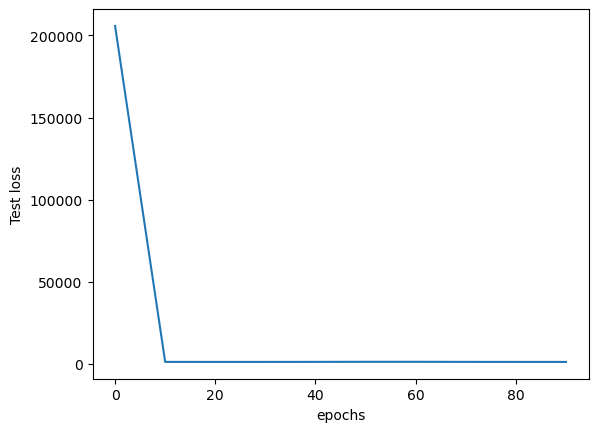

In [4]:
def plot_test_loss(test_loss, print_every, path): 
    print(test_loss)
    n_epochs = len(test_loss)
    epochs = [i * print_every for i in range(n_epochs)]
    plt.plot(epochs, test_loss)
    plt.xlabel("epochs")
    plt.ylabel("Test loss")
    plt.savefig(path)

path = "Figures/model1_training.png"
plot_test_loss(test_loss, 10, path)

In [11]:
simple.eval()
test_loss = []
test_iterator = test_iter._get_iterator()

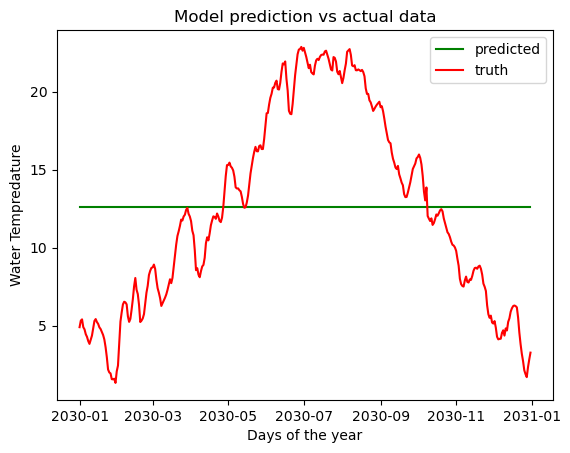

In [16]:
with torch.no_grad():
    tensors = test_iterator.next()
    test, target = tensors[0], tensors[1]
    
    prediction = simple(test)
    loss = loss_function(prediction, target)
    test_loss.append(loss)
    plot_prediction(prediction, target)